# Import Libraries

In [1]:
# Import pandas library for data manipulation and analysis
import pandas as pd 

# Import numpy library for numerical computation
import numpy as np

# Import seaborn library for statistical data visualization
import seaborn as sns 

# Import matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Configure matplotlib to render plots inline within the notebook
%matplotlib inline


C:\Users\LENOVO T460S\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import the dataset

In [2]:
# Importing the dataset into a pandas DataFrame
df = pd.read_csv("AQI Data.csv")

# Printing the shape of the DataFrame (number of rows and columns)
print(df.shape)

# Displaying the first few rows of the DataFrame
df.head()

(1093, 9)


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


#### Understanding the Data

The table below show the meaning of the abbreviation used:

| Abbreviation | Full Meaning |
|--------------|--------------|
|  **T**       | Average Annual Temperature |
|  **TM**      | Annual Average Maximum Temperature |
|  **Tm**      | Average Annual Minimum Temperature |
|  **SLP**     | Sea Level Pressure |
|  **H**       | Humidity |
|  **VV**      | Wind Speed |
|  **V**       | Annual Average Wind Speed |
|  **VM**      | Maximum Wind Speed |
|  **PM 2.5**    | Air Quality Index |

# Data Analysis

- ### Data Preprocessing

In [3]:
# Rename columns for clarity
df.rename(columns={
    'T': 'Avg_Annual_Temperature',
    'TM': 'Avg_Annual_Max_Temperature',
    'Tm': 'Avg_Annual_Min_Temperature',
    'SLP': 'Sea_Level_Pressure',
    'H': 'Humidity',
    'VV': 'Wind_Speed',
    'V': 'Avg_Annual_Wind_Speed',
    'VM': 'Max_Wind_Speed',
    'PM 2.5': 'Air_Quality_Index'
}, inplace=True)

df.head()

,Avg_Annual_Temperature,Avg_Annual_Max_Temperature,Avg_Annual_Min_Temperature,Sea_Level_Pressure,Humidity,Wind_Speed,Avg_Annual_Wind_Speed,Max_Wind_Speed,Air_Quality_Index
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


- Our target feature is the Air Quality Index

Understanding Air Quality Index

The air quality index is used to measure air quality, which is a figure provided by the authorities in an area and reflects the amounts of pollutants present in the air. When the air quality is good, that is, it has few pollutants, people can breathe it indefinitely without their health being affected. When it is bad, there can be eye irritations, all kinds of respiratory and even heart problems. If the air quality falls or, due to atmospheric conditions, it is expected that it may fall, the authorities can take measures such as prohibiting the circulation of all vehicles that emit pollution, some of them, prohibiting the practice of outdoor sports or Recommend the use of masks.

AQI values `at and below 100` are generally considererd to be `satisfactory`. When AQI are above 100, air quality is considered to be unhealthy, at first for members of populations at greater risk of a health effect, then for the entire population as AQI values get higher `(greater than 150)`. It is illustrated in the image below.

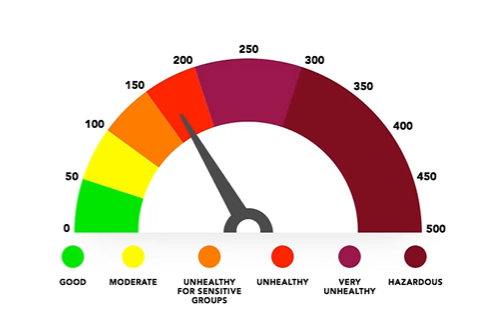

- Checking for Missing Value

In [4]:
# Check for missing values

missing_values = df.isnull().sum()

missing_values = pd.DataFrame(missing_values, columns=['Missing Values'])

missing_values

,Missing Values
Avg_Annual_Temperature,0
Avg_Annual_Max_Temperature,0
Avg_Annual_Min_Temperature,0
Sea_Level_Pressure,0
Humidity,0
Wind_Speed,0
Avg_Annual_Wind_Speed,0
Max_Wind_Speed,0
Air_Quality_Index,1


We have just one row with missing value in air_quality, hence we cabn safely drop it.

In [5]:
df.dropna(inplace = True)

# Check if missing values were dropped

missing_values = df.isnull().sum()

missing_values = pd.DataFrame(missing_values, columns=['Missing Values'])

missing_values

,Missing Values
Avg_Annual_Temperature,0
Avg_Annual_Max_Temperature,0
Avg_Annual_Min_Temperature,0
Sea_Level_Pressure,0
Humidity,0
Wind_Speed,0
Avg_Annual_Wind_Speed,0
Max_Wind_Speed,0
Air_Quality_Index,0


In [6]:
df.shape

(1092, 9)

- Seeing Unique Values 

In [7]:
pd.DataFrame(df.nunique(), columns=['Num_of_distinct_values'])

,Num_of_distinct_values
Avg_Annual_Temperature,243
Avg_Annual_Max_Temperature,238
Avg_Annual_Min_Temperature,223
Sea_Level_Pressure,253
Humidity,76
Wind_Speed,22
Avg_Annual_Wind_Speed,94
Max_Wind_Speed,27
Air_Quality_Index,555


- Checking Datatypes

In [8]:
df.dtypes

Avg_Annual_Temperature        float64
Avg_Annual_Max_Temperature    float64
Avg_Annual_Min_Temperature    float64
Sea_Level_Pressure            float64
Humidity                      float64
Wind_Speed                    float64
Avg_Annual_Wind_Speed         float64
Max_Wind_Speed                float64
Air_Quality_Index             float64
dtype: object

All are continous variables

In [9]:
df.describe()

,Avg_Annual_Temperature,Avg_Annual_Max_Temperature,Avg_Annual_Min_Temperature,Sea_Level_Pressure,Humidity,Wind_Speed,Avg_Annual_Wind_Speed,Max_Wind_Speed,Air_Quality_Index
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,26.019963,32.494414,19.468040,1008.070513,62.892857,2.003480,6.753297,15.809432,109.090984
std,7.232026,6.670017,7.437543,7.523290,15.693982,0.747784,3.842442,7.310394,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.250000,21.200000,1008.050000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


- ### Data Visualization


     - Display the target feature on distribution plot

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


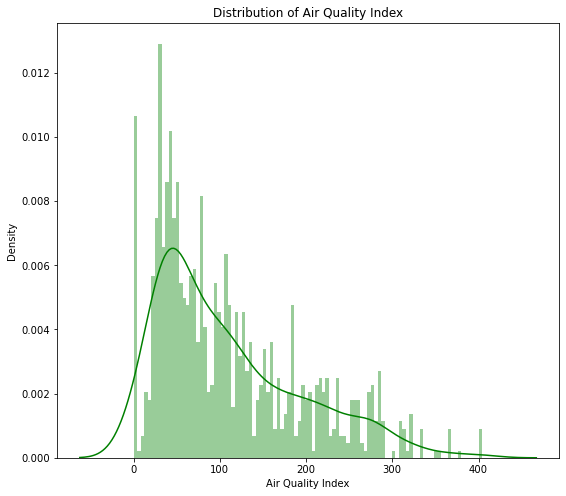

In [10]:
plt.figure(figsize=(9, 8))

sns.distplot(df['Air_Quality_Index'], color='g', bins=100, hist_kws={'alpha': 0.4})

plt.title('Distribution of Air Quality Index')
plt.xlabel('Air Quality Index')
plt.ylabel('Density')

plt.show();

More of our dataset are at or less than 100. 

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

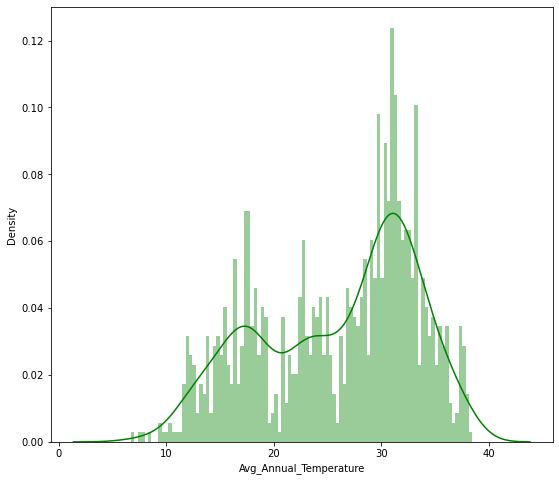

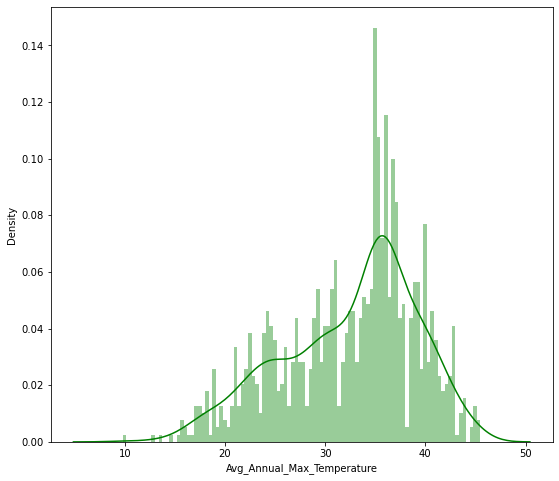

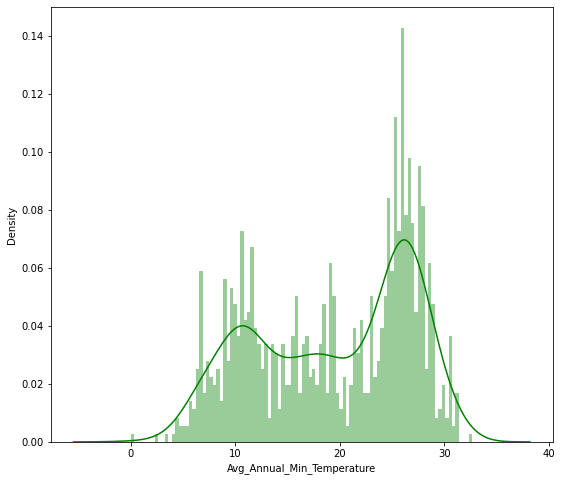

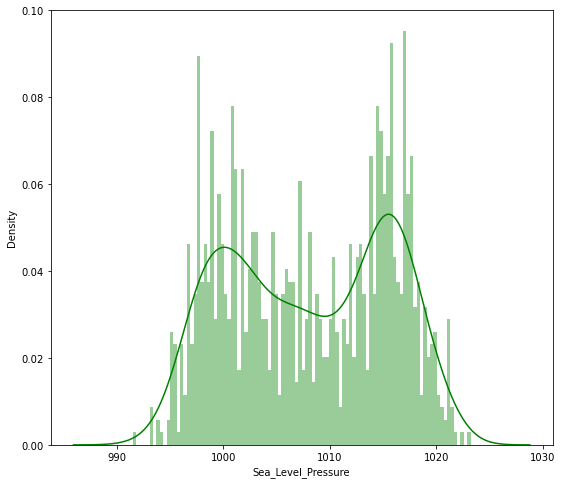

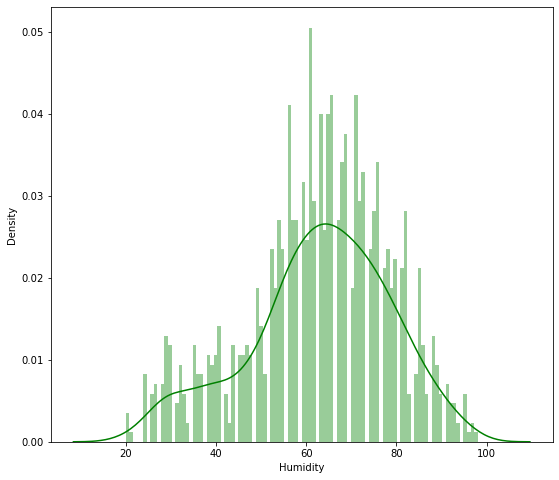

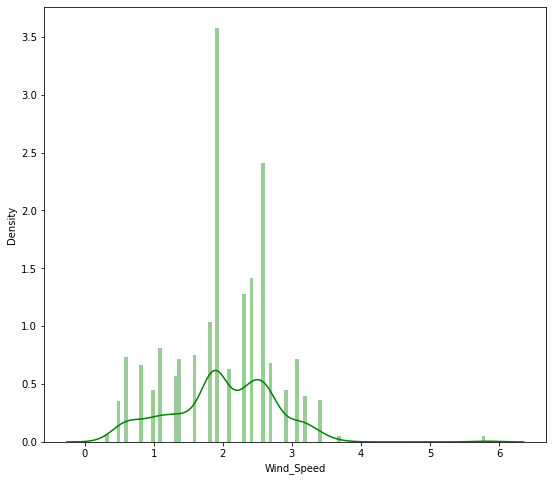

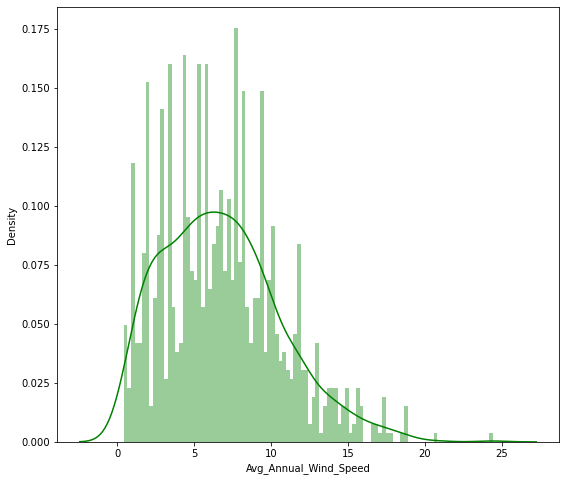

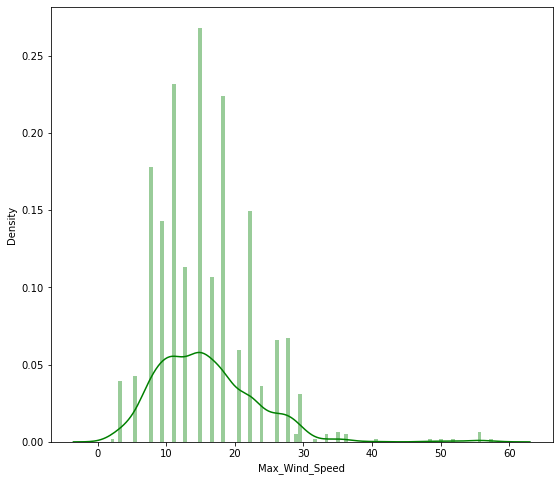

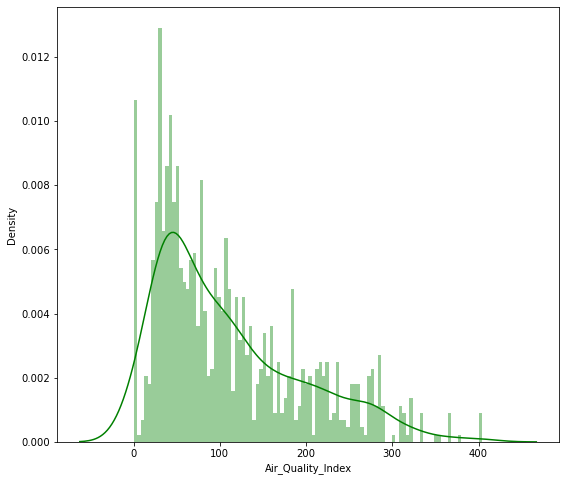

In [16]:
columns = df.columns

for column in columns:
    plt.figure(figsize=(9,8))
    sns.distplot(df[column], color='g', bins=100, hist_kws={'alpha': 0.4})

- Checking for Correlation

plot a Heat Map

In [11]:
correlation = df.corr()
correlation

,Avg_Annual_Temperature,Avg_Annual_Max_Temperature,Avg_Annual_Min_Temperature,Sea_Level_Pressure,Humidity,Wind_Speed,Avg_Annual_Wind_Speed,Max_Wind_Speed,Air_Quality_Index
Avg_Annual_Temperature,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
Avg_Annual_Max_Temperature,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Avg_Annual_Min_Temperature,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
Sea_Level_Pressure,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
Humidity,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
Wind_Speed,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
Avg_Annual_Wind_Speed,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
Max_Wind_Speed,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
Air_Quality_Index,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


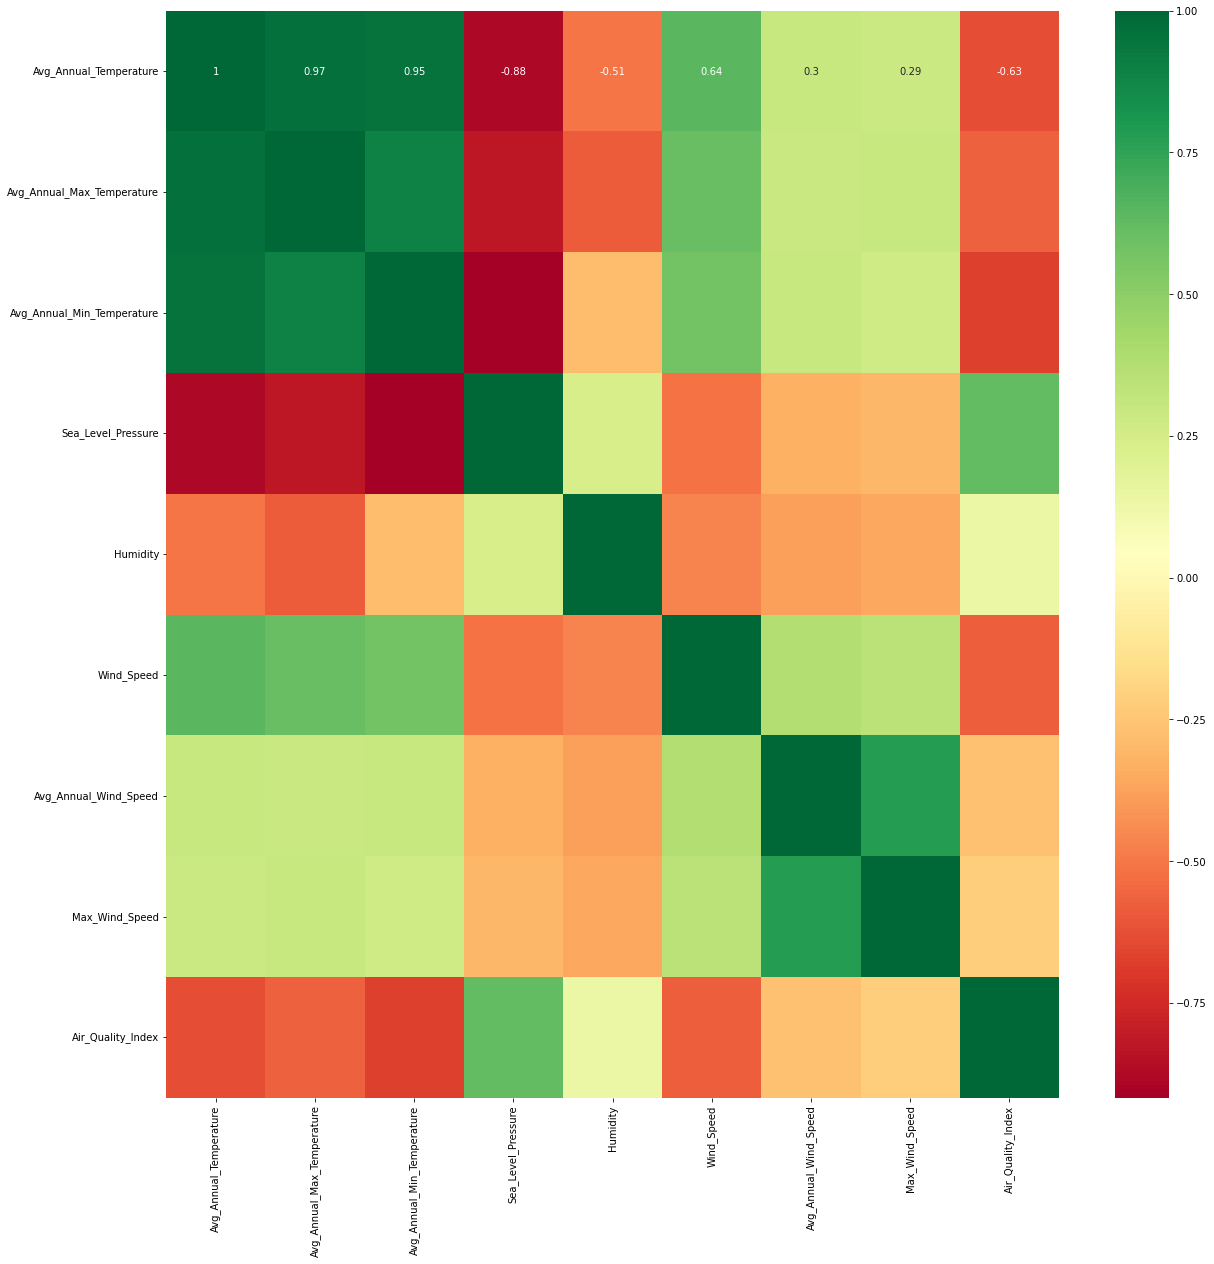

In [12]:
top_corr_features = correlation.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
import scipy.stats as stat
import pylab

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_curve(df, feature):
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist='norm', plot=plt)
    plt.title(f'{feature} Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plots
    plt.show()


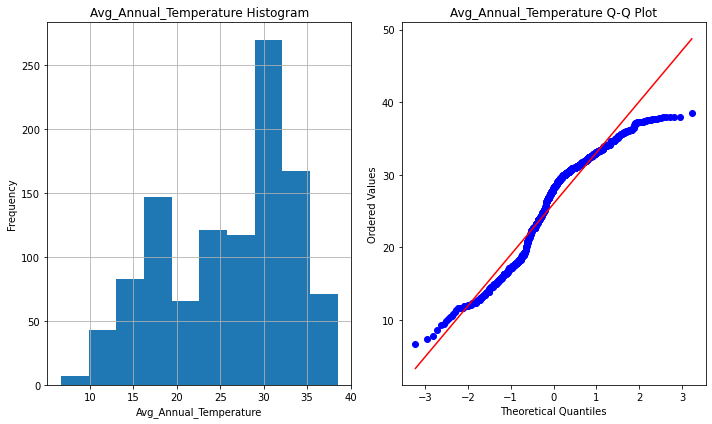

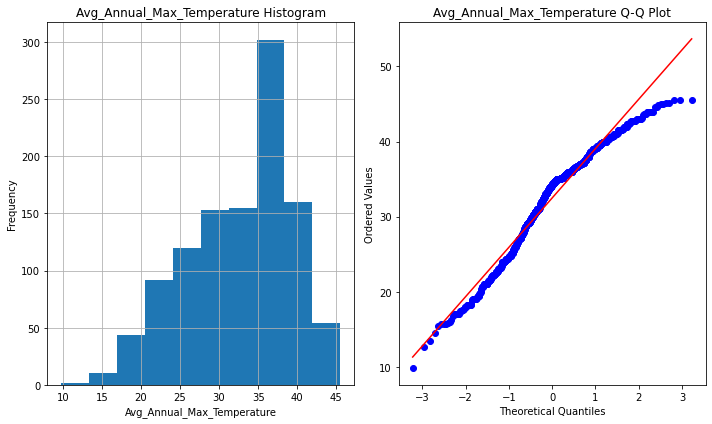

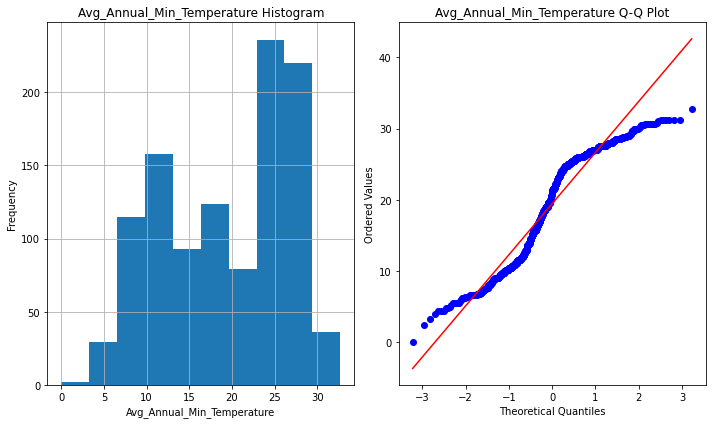

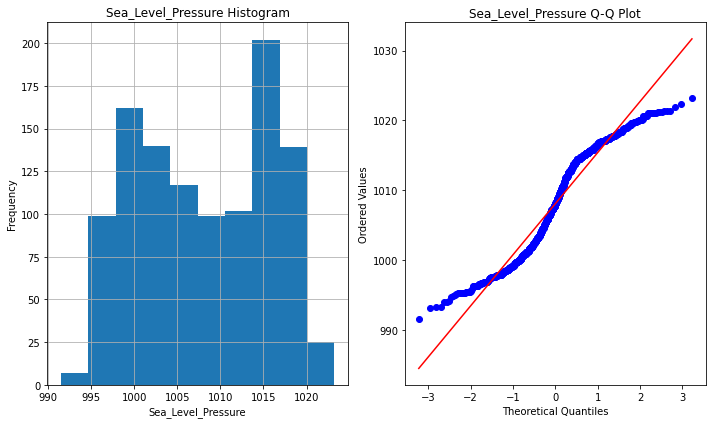

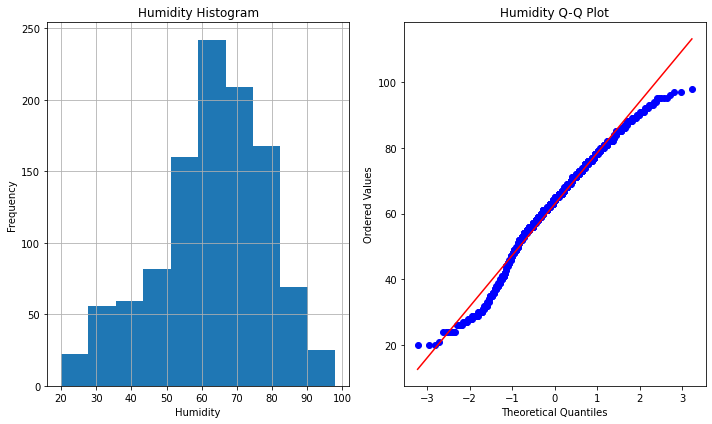

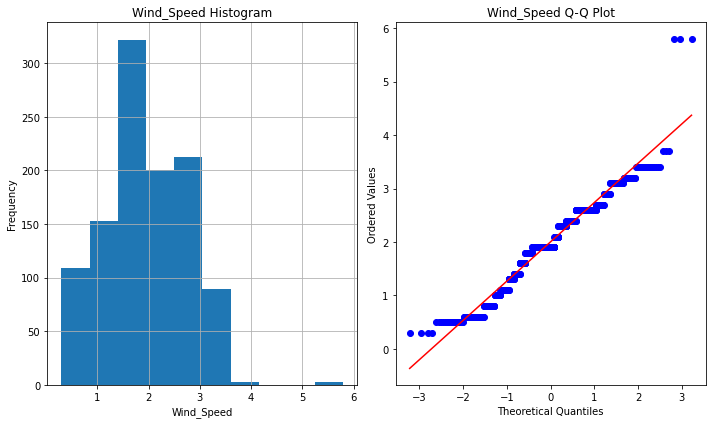

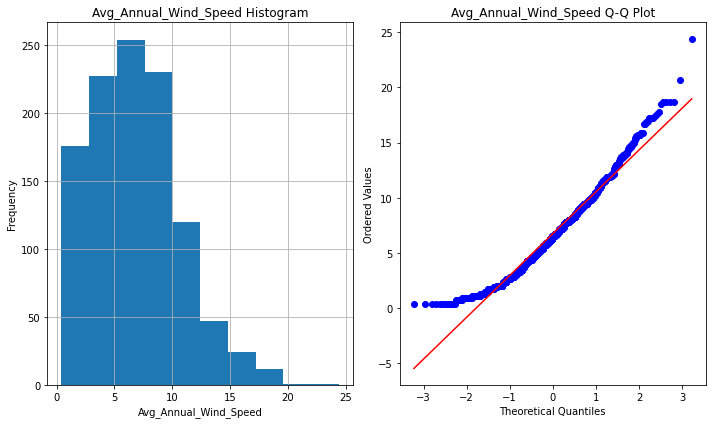

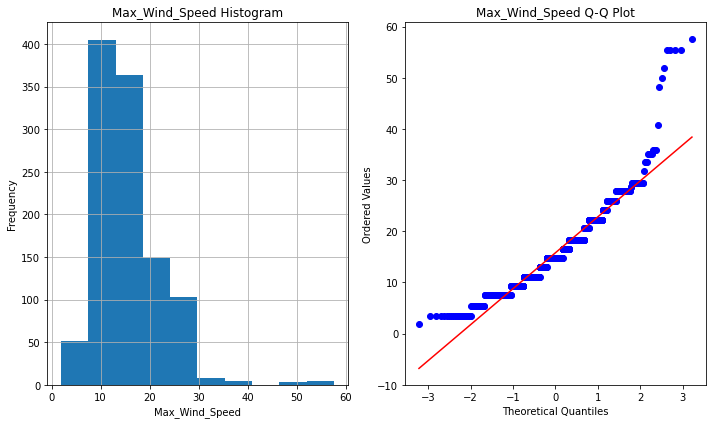

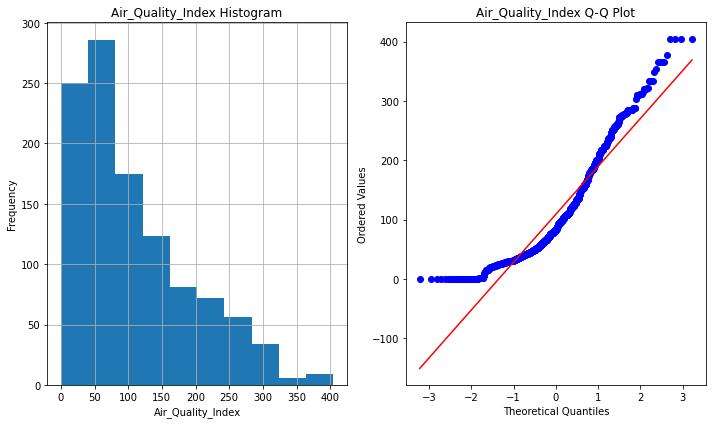

In [17]:
for column in columns:
    plot_curve(df, column)

# Feature Enginerring

- Divide the dataset vertically to target fetures and independent feature

In [18]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

print(x.shape)
y.shape

(1092, 8)


(1092,)

- Feature Importance

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [20]:
model.feature_importances_

array([0.16346094, 0.10525988, 0.22274017, 0.13424698, 0.08713002,
       0.19185051, 0.05403681, 0.04127468])

Plot graph of feature importances for better visualization

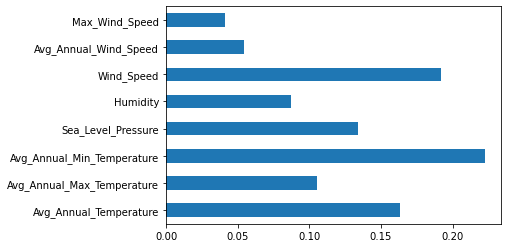

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

- Standardizing the Data

In [22]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
x= scale.fit_transform(x)

- Splitting the Data Horizontally into Train and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(764, 8)
(328, 8)
(764,)


(328,)

# Model Building and Prediction Using ML models


- #### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

print("Linear Regression Coefficient: ", regressor.coef_)
print("Linear Regression Intercept: ", regressor.intercept_)
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Linear Regression Coefficient:  [-18.7736861    6.01159773 -31.37037772   1.46022564 -18.36923204
 -31.30795164  -7.68512362   5.09009382]
Linear Regression Intercept:  110.25762189586656
Coefficient of determination R^2 <-- on train set: 0.5494718329341765
Coefficient of determination R^2 <-- on train set: 0.4794720402754765


In [47]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(regressor,x,y,cv=5)
score.mean()

0.4710569304807393

In [48]:
prediction=regressor.predict(X_test)

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Air_Quality_Index', ylabel='Density'>

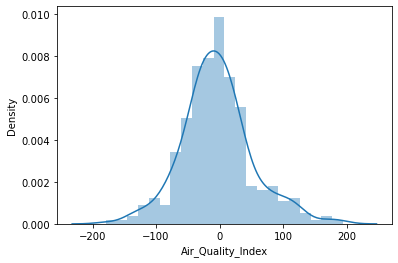

In [49]:
sns.distplot(y_test-prediction)

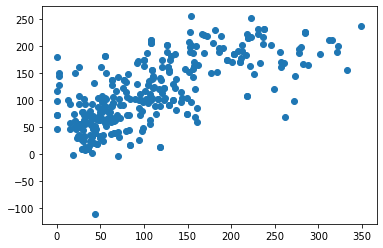

In [50]:
plt.scatter(y_test,prediction)

In [51]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 41.84790296710792
MSE: 3134.163279581495
RMSE: 55.98359830862513


In [52]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, prediction))

r2_score is 0.4794720402754765


- #### Using XQ Boost Regression Model

In [53]:
from xgboost import XGBRegressor

xg= XGBRegressor()

- Using Randomised Search CV with XG Boost regressor to find the best parameter

In [55]:
from sklearn.model_selection import RandomizedSearchCV

#First we will define various parameters and their values used in XGB Regressor

# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
[5, 10, 15, 20, 25, 30]
[0.7, 0.6, 0.8]
[3, 4, 5, 6, 7]


In [56]:
#Storing all these params in a dict

param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [57]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [58]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.0s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   2.5s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   3.1s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   3.0s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   2.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   5.3s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   5.3s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   5.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   5.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   3.9s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   4.1s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   3.7s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   4.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [60]:
xgr = XGBRegressor(subsample= 0.7,
 n_estimators= 1000,
 min_child_weight= 7,
 max_depth= 10,
 learning_rate= 0.05)

xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=7,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Air_Quality_Index', ylabel='Density'>

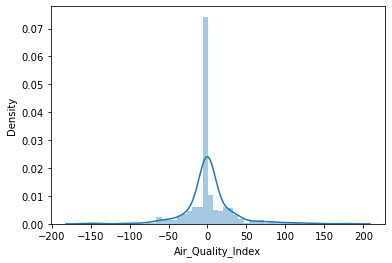

In [61]:
predictions=xgr.predict(X_test)

sns.distplot(y_test-predictions)

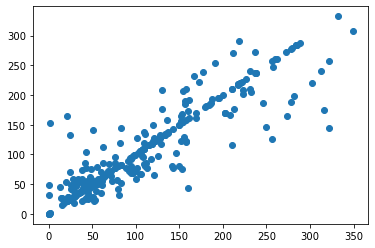

In [62]:
plt.scatter(y_test,predictions)

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.121231673823715
MSE: 1076.034837230939
RMSE: 32.80296994527994


In [64]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, predictions))

r2_score is 0.8212900323141041


- #### Using Random ForestRegression Model

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

# Defining Params

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.9s
[CV] END max_depth=20, max_feat

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=25, max_feature

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_feat

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   2.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   2.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   3.3s
[CV] END max_depth=30, max_feat

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO T460S\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO T460S\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO T460S\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LEN

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

 Model with Best Param

In [68]:
rf1= RandomForestRegressor(n_estimators= 500,
 min_samples_split=  2,
min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=15)

rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500)

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Air_Quality_Index', ylabel='Density'>

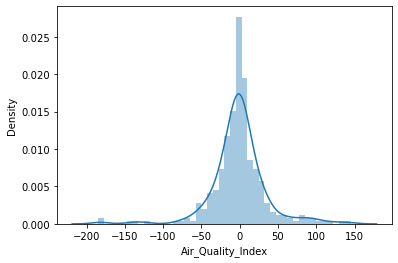

In [69]:
ypred= rf1.predict(X_test)

sns.distplot(y_test-ypred)

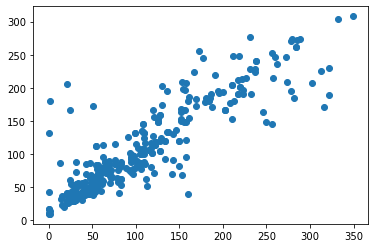

In [70]:
plt.scatter(y_test,ypred)

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 22.420993730829125
MSE: 1298.327648300129
RMSE: 36.03231394595869


In [72]:
from sklearn.metrics import r2_score

print("r2_score is",r2_score(y_test, ypred))

r2_score is 0.7843712080265816


- Importing the best performing Model

In [73]:
import pickle

# open a file, where you ant to store the data
file = open('aqi_XGBreg_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgr, file)

xgr

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=7,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

### AUTOML

In [27]:
import tpot
from tpot import TPOTRegressor

# check tpot version
print('tpot: %s' % tpot.__version__)

tpot: 0.12.2


C:\Users\LENOVO T460S\AppData\Roaming\Python\Python39\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


First, we can define the method for evaluating models. We will use a good practice of repeated k-fold cross-validation with three repeats and 10 folds

In [28]:
from sklearn.model_selection import RepeatedKFold

# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

# perform the search
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -20.902679834947552

Generation 2 - Current best internal CV score: -19.96807150047817

Generation 3 - Current best internal CV score: -19.96807150047817

Generation 4 - Current best internal CV score: -18.550015460616972

Generation 5 - Current best internal CV score: -18.550015460616972

Best pipeline: KNeighborsRegressor(RidgeCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False)), n_neighbors=72, p=1, weights=distance)


TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=5, n_jobs=-1, population_size=50, random_state=1,
              scoring='neg_mean_absolute_error', verbosity=2)

In [29]:
print(model.score(X_test, y_test))

-16.693127886893897


 Finding the best pipeline

In [30]:
model.fitted_pipeline_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('stackingestimator', StackingEstimator(estimator=RidgeCV())),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=72, p=1, weights='distance'))])

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Air_Quality_Index', ylabel='Density'>

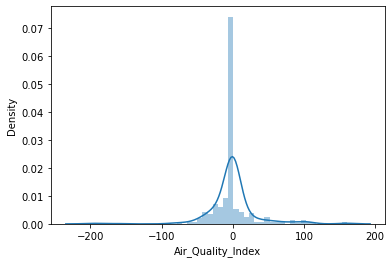

In [31]:
pred= model.predict(X_test)

sns.distplot(y_test-pred)

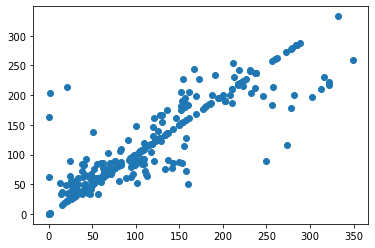

In [32]:
plt.scatter(y_test,pred)

In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16.693127886893897
MSE: 1176.17119114707
RMSE: 34.295352325746265


In [34]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, pred))

r2_score is 0.8046591910500916
